# Bias variance decomposition

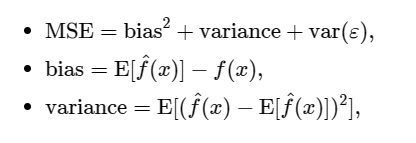

Выбор оптимальной модели
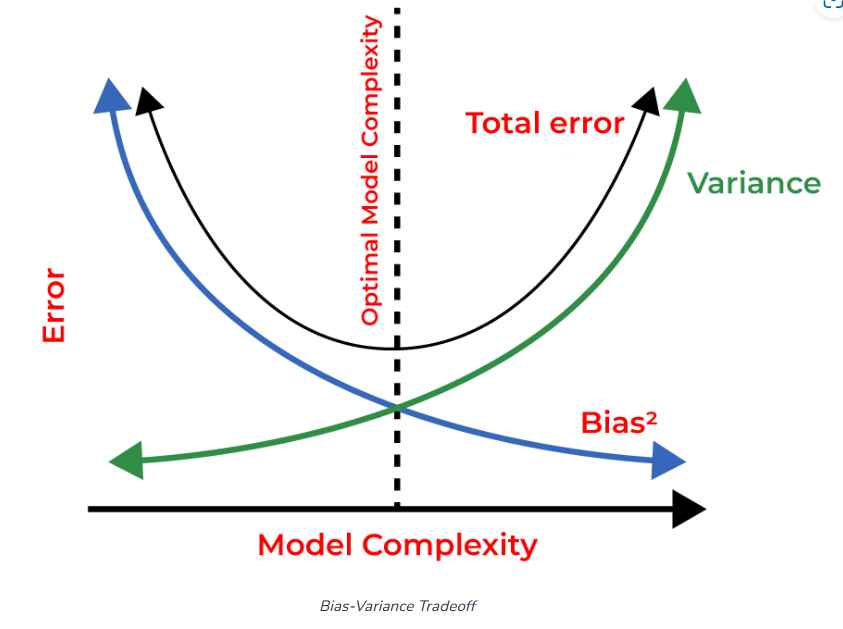

# Bias:
    - low bias  - модель использует несколько значимых особенностей для предсказания. Их достаточно, чтобы предсказывать с 
    "нормальной" точность, модель работает хорошо.
    - high bias - точность предсказания недостаточна:
        -- использовать иную модель (более сложную)
        -- увеличить количество характеристик
        -- увеличить количество данных
# Variance:
    - low var - возможно недообучение. низкий уровень подгонки значений.
    - high var - возможно переобучение. Высокий уровень реагирования на изменение в тренировочных данных.
    
 - использовать кросс валидацию для оценки bias, variance.
 - использовать более грамотный конструктор характеристик данных.
 - возможно, необходимо упростить модель.

Варианты:
- HB,LV - возможно недообучение.
- LB, HV- возможно переобучение.
- HB, HV - основные тренды данных не отображаются при предсказании, изменения в данных - тоже. Почти случайное предсказание.
- LB, LV - модель достаточно точна :)   

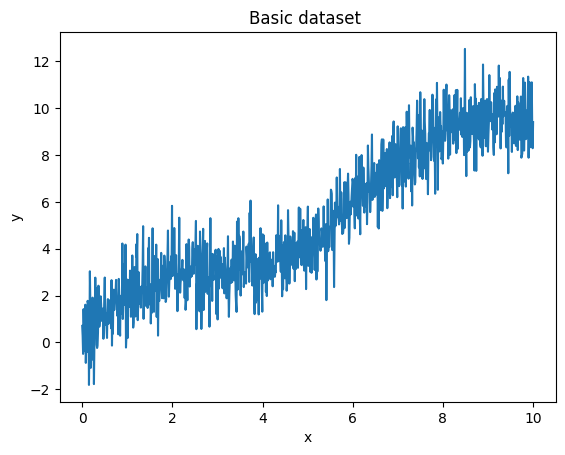

MSE:  1.282808205845046
Bias:  1.2786967201973507
Variance:  0.004111485647695449


In [81]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split

N_total = 1000
features_num = 1
mu = 0.0
sigma = 1.0
n_classes = 5

mu_reg = 5.0
sigma_reg = 1.0

X = np.linspace(0.0001, 10.0, num=N_total)
y = X + np.sin(X) + np.random.normal(0,1,N_total)

N_steps = 50


plt.plot(X, y)  
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title('Basic dataset ') 
plt.show()


mses=  []
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=111)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

mse, bias, var = bias_variance_decomp( LinearRegression(), X_train, y_train, X_test, y_test, 
                                      loss='mse', num_rounds=10, random_seed=1)



print('MSE: ', mse)
print('Bias: ', bias)
print('Variance: ', var)

Доп материалы: https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

# Домашнее задание: реализовать BVD

In [82]:
train_errors, test_errors =[],[]

biases, variances = [],[]
preds = []
k = 5 # number of repeated steps
poly_degree_max = 10

for pd in range(poly_degree_max):
    regr = make_pipeline(StandardScaler(), PolynomialFeatures(degree=pd),SVR(C=1.0, epsilon=0.2))
    preds_tmp = []

    X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X_train, y_train, test_size=0.2, random_state=111)
    
    for i in range(k):
        p = np.random.permutation(len(X_train_tmp))
        regr.fit(X_train_tmp[p], y_train_tmp[p])
        # calc predictions
        preds_tmp.append(regr.predict(X_test_tmp))

    # biases calculation
    bias = np.mean((np.mean(preds_tmp, axis=0) - y_test_tmp) ** 2)
    biases.append(bias)
    
    #variance calculation
    variance = np.mean(np.var(preds_tmp, axis = 0))
    variances.append(variance)
    
    regr.fit(X_train, y_train)
    
    y_pred_train = regr.predict(X_train)
    y_pred_test = regr.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

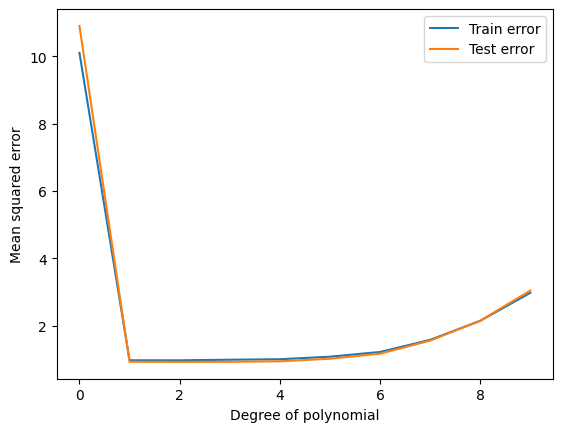

In [83]:
plt.plot(range(poly_degree_max), train_errors, label='Train error')
plt.plot(range(poly_degree_max), test_errors, label='Test error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.show()

In [84]:
print(variances)

[0.0, 9.013106986367619e-08, 1.6604468461315807e-09, 1.997477471449244e-29, 6.126844035419069e-09, 2.0595201317357035e-08, 6.6271640900697924e-09, 5.289618977554031e-29, 5.885054886600344e-29, 9.047621366790712e-29]


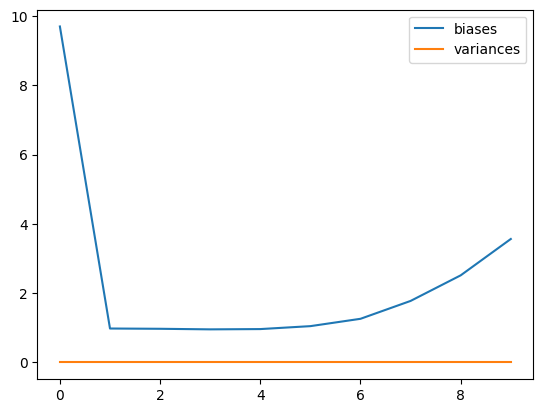

In [85]:
plt.plot(range(poly_degree_max), biases, label='biases')
plt.plot(range(poly_degree_max), variances, label='variances')
plt.legend()
plt.show()

 - Что можно сказать о выбранной модели по результатам рассчитанных bias and variance?

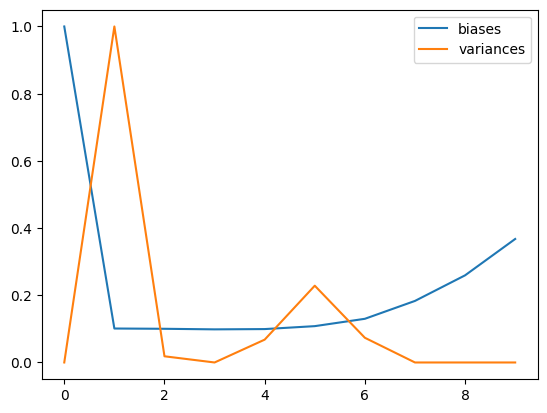

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

biases = np.array(biases)
variances = np.array(variances)
plt.plot(range(poly_degree_max), biases / max(biases), label='biases')
plt.plot(range(poly_degree_max), variances / max(variances), label='variances')
plt.legend()
plt.show()

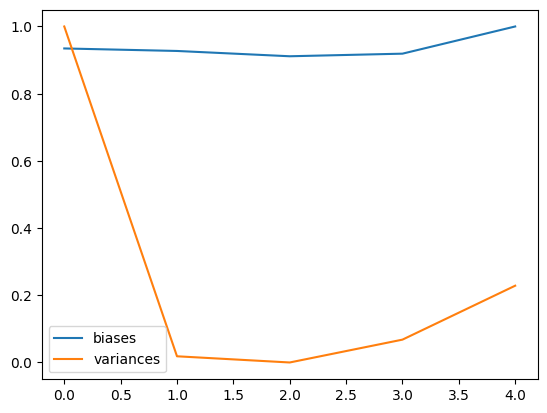

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

biases = np.array(biases[1:6])
variances = np.array(variances[1:6])
plt.plot(range(5), biases / max(biases), label='biases')
plt.plot(range(5), variances / max(variances), label='variances')
plt.legend()
plt.show()

In [89]:
print(f"best bias: {biases[2]}")
print(f"best var: {variances[2]}")

best bias: 0.9561033941642009
best var: 1.997477471449244e-29


Из предложенных моделей стоит взять третью (с степенью полинома 2), тк дает лучшую комбинацию bias + variance => это лучшая из этих моделей, тк по идее и предсказывает что надо, и на новых данных меньше лажать будет

Судя по чиселкам (отклонение для _y_) - так себе, разброс в 0.95 в синусе это сильно (несмотря что добавка с рандомом сглаживает влияние разброса). На чистом синусе вообще не подойдет